<a href="https://colab.research.google.com/github/surendiran-20cl/Heart_Disease_Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Heart Disease Prediction Project**  

#### **Project Description**  
Heart disease is one of the leading causes of mortality worldwide, making early diagnosis crucial for timely intervention. This project aims to build a **machine learning model** to predict the likelihood of heart disease based on patient health parameters.  

Using a dataset containing **medical attributes** such as age, cholesterol levels, blood pressure, and chest pain type, we apply multiple classification algorithms—including **Logistic Regression, Decision Tree, and Random Forest**—to identify the best-performing model.  

The models are evaluated using **accuracy, precision, recall, F1-score, and ROC-AUC** to determine their effectiveness. The **Random Forest model** achieved the highest **ROC-AUC score (0.91)**, making it the most reliable predictor.  

This project demonstrates the power of machine learning in **healthcare analytics** and provides insights into key **risk factors of heart disease**, aiding in early detection and better decision-making.

Dataset Link: https://drive.google.com/file/d/1-0gyTuv_7m_vq0ZDoHNZCJTobwDUoHQJ/view?usp=sharing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Step 1:Load the dataset
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Intellipaat Colab Files/Heart Disease Prediction/Heart_disease_prediction_dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Here are the explanations for column in the dataset:

1. **age** – Age of the patient in years.  
2. **sex** – Gender of the patient (0 = Female, 1 = Male).  
3. **cp (Chest Pain Type)** – Type of chest pain experienced:  
   - 0 = Typical angina  
   - 1 = Atypical angina  
   - 2 = Non-anginal pain  
   - 3 = Asymptomatic  
4. **trestbps (Resting Blood Pressure)** – Blood pressure (in mm Hg) when the patient is at rest.  
5. **chol (Serum Cholesterol)** – Cholesterol level in mg/dL.  
6. **fbs (Fasting Blood Sugar > 120 mg/dL)** – Whether fasting blood sugar is greater than 120 mg/dL (1 = Yes, 0 = No).  
7. **restecg (Resting ECG Results)** – Results of resting electrocardiogram:  
   - 0 = Normal  
   - 1 = ST-T wave abnormality  
   - 2 = Probable left ventricular hypertrophy  
8. **thalach (Maximum Heart Rate Achieved)** – Maximum heart rate reached during exercise.  
9. **exang (Exercise-Induced Angina)** – Whether the patient experiences chest pain due to exercise (1 = Yes, 0 = No).  
10. **oldpeak (ST Depression Induced by Exercise)** – ST segment depression relative to rest (indicates heart stress).  
11. **slope (Slope of the Peak Exercise ST Segment)** –  
    - 0 = Upsloping  
    - 1 = Flat  
    - 2 = Downsloping  
12. **ca (Number of Major Vessels Colored by Fluoroscopy)** – Number of blood vessels (0–3) colored by the fluoroscopy test.  
13. **thal (Thalassemia)** – Type of blood disorder:  
    - 1 = Normal  
    - 2 = Fixed defect  
    - 3 = Reversible defect  
14. **target (Heart Disease Indicator)** – Whether the patient has heart disease (1 = Yes, 0 = No).  


In [3]:
#Step 2: Data Exploration
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# Get summary statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# Check for missing values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [6]:
# Check correlation between features
correlation = df.corr()
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


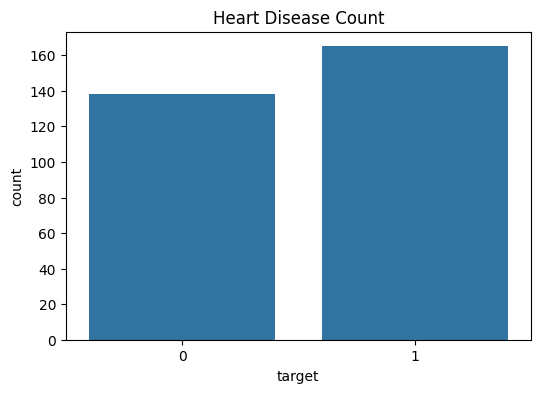

In [9]:
#Step 3: Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot of heart disease
plt.figure(figsize=(6, 4))
sns.countplot(x="target", data=df)
plt.title("Heart Disease Count")
plt.show()

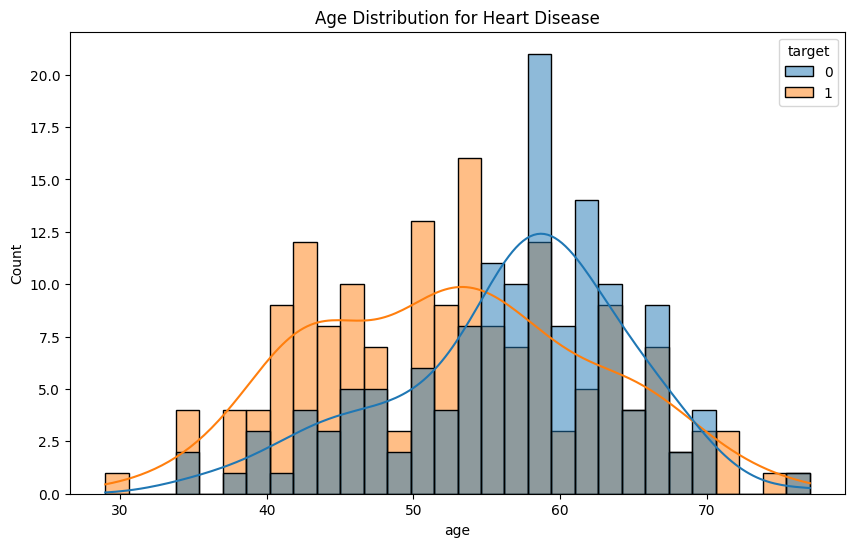

In [8]:
# Age distribution based on heart disease
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="age", hue="target", bins=30, kde=True)
plt.title("Age Distribution for Heart Disease")
plt.show()

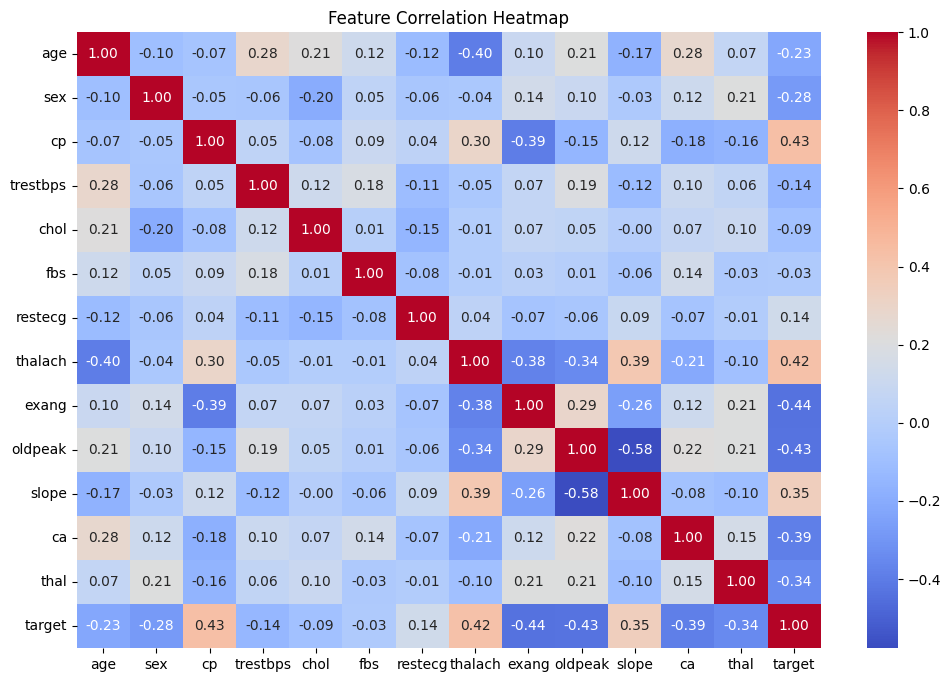

In [10]:
# Heatmap for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [11]:
#Step 4: Train Test Split
from sklearn.model_selection import train_test_split

X = df.drop(columns=["target"])  # Features
y = df["target"]  # Target variable

# Splitting dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
#Step 5: Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Initialize and train logistic regression model
lr_model = LogisticRegression(max_iter=3000)
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8131868131868132
[[32  9]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [15]:
#Step 6: Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz

# Initialize and train decision tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Visualize the decision tree
dot_data = export_graphviz(dt_model, out_file=None, filled=True, rounded=True, feature_names=X.columns)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

Decision Tree Accuracy: 0.7362637362637363
[[33  8]
 [16 34]]
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        41
           1       0.81      0.68      0.74        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.75      0.74      0.74        91



'decision_tree.pdf'

Decision Tree Link: https://drive.google.com/file/d/16aQze0POqN9v2iMFIjUcwKnqBpdC_6xk/view?usp=sharing

In [16]:
#Step 7: Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Initialize and train random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8241758241758241
[[33  8]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



Logistic Regression Accuracy: 0.8131868131868132
Decision Tree Accuracy: 0.7362637362637363
Random Forest Accuracy: 0.8241758241758241


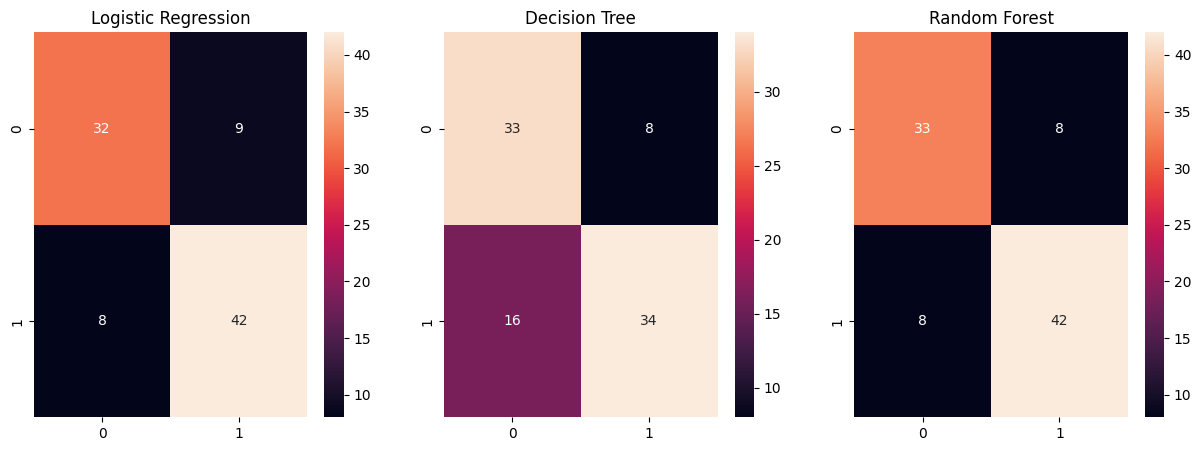

In [17]:
#Step 8: Model Comparison
import numpy as np

# Confusion matrices
models = {"Logistic Regression": y_pred_lr, "Decision Tree": y_pred_dt, "Random Forest": y_pred_rf}
for name, y_pred in models.items():
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")

# Visualize confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, (name, y_pred) in enumerate(models.items()):
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", ax=axes[idx])
    axes[idx].set_title(name)
plt.show()

In [18]:
#Step 9: Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Function to evaluate models
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)


    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    return accuracy, precision, recall, f1

In [19]:
#Evaluate all models
# Evaluate Logistic Regression
acc_lr, prec_lr, rec_lr, f1_lr = evaluate_model("Logistic Regression", y_test, y_pred_lr)

# Evaluate Decision Tree
acc_dt, prec_dt, rec_dt, f1_dt = evaluate_model("Decision Tree", y_test, y_pred_dt)

# Evaluate Random Forest
acc_rf, prec_rf, rec_rf, f1_rf = evaluate_model("Random Forest", y_test, y_pred_rf)


Model: Logistic Regression
Accuracy: 0.8132
Precision: 0.8235
Recall: 0.8400
F1-score: 0.8317

Confusion Matrix:
[[32  9]
 [ 8 42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91


Model: Decision Tree
Accuracy: 0.7363
Precision: 0.8095
Recall: 0.6800
F1-score: 0.7391

Confusion Matrix:
[[33  8]
 [16 34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        41
           1       0.81      0.68      0.74        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.75      0.74      0.74        91


Model: Random Forest
Accuracy: 0.8242

In [20]:
#Compare and select the best model
# Store results in a dictionary
model_results = {
    "Logistic Regression": [acc_lr, prec_lr, rec_lr, f1_lr],
    "Decision Tree": [acc_dt, prec_dt, rec_dt, f1_dt],
    "Random Forest": [acc_rf, prec_rf, rec_rf, f1_rf]
}

# Convert dictionary to a DataFrame for better visualization
results_df = pd.DataFrame(model_results, index=["Accuracy", "Precision", "Recall", "F1-score"])
print("\nModel Comparison:\n")
print(results_df)

# Select the best model based on accuracy and F1-score
best_model = results_df.idxmax(axis=1)["Accuracy"]
print(f"\nThe best model based on accuracy is: {best_model}")


Model Comparison:

           Logistic Regression  Decision Tree  Random Forest
Accuracy              0.813187       0.736264       0.824176
Precision             0.823529       0.809524       0.840000
Recall                0.840000       0.680000       0.840000
F1-score              0.831683       0.739130       0.840000

The best model based on accuracy is: Random Forest


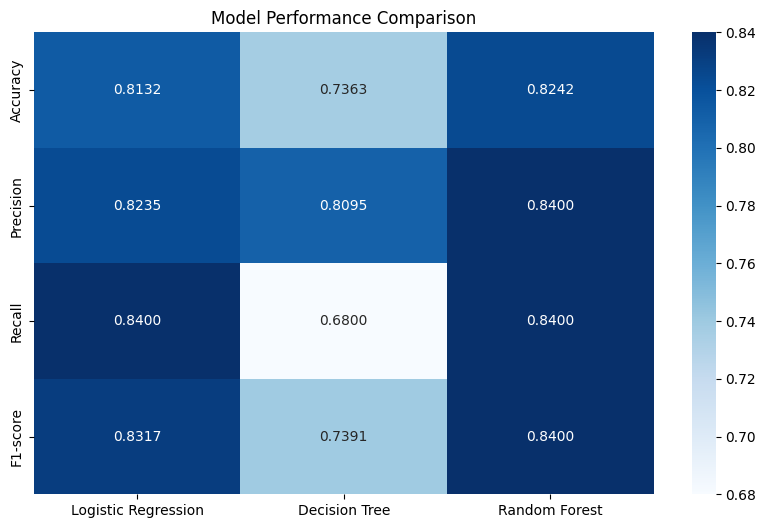

In [21]:
#Visualize model performance
import seaborn as sns
import matplotlib.pyplot as plt

# Plot model comparison
plt.figure(figsize=(10, 6))
sns.heatmap(results_df, annot=True, cmap="Blues", fmt=".4f")
plt.title("Model Performance Comparison")
plt.show()

In [22]:
#Compute ROC AUC score
#The ROC-AUC score helps measure how well the model distinguishes between positive and negative cases. Higher values (closer to 1) indicate better performance.
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1 (heart disease present)
y_pred_lr_prob = lr_model.predict_proba(X_test)[:, 1]
y_pred_dt_prob = dt_model.predict_proba(X_test)[:, 1]
y_pred_rf_prob = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC-AUC scores
roc_auc_lr = roc_auc_score(y_test, y_pred_lr_prob)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt_prob)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_prob)

# Print ROC-AUC scores
print(f"Logistic Regression ROC-AUC: {roc_auc_lr:.4f}")
print(f"Decision Tree ROC-AUC: {roc_auc_dt:.4f}")
print(f"Random Forest ROC-AUC: {roc_auc_rf:.4f}")

Logistic Regression ROC-AUC: 0.8815
Decision Tree ROC-AUC: 0.7424
Random Forest ROC-AUC: 0.9095


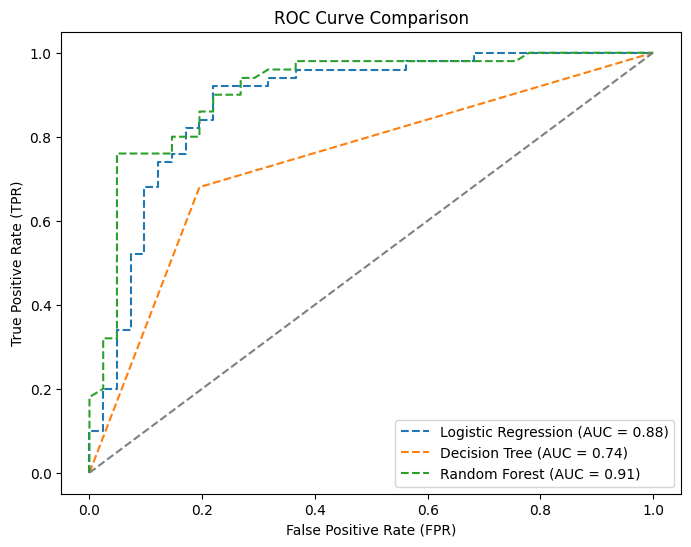

In [23]:
# Compute ROC curve for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr_prob)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_prob)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})", linestyle="--")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})", linestyle="--")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", linestyle="--")

# Random chance line (baseline)
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")

# Labels and title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

**ROC Curve Comparison** graph provides insights into the performance of models.  

### **Key Takeaways**  
1. **Random Forest (AUC = 0.91)**  
   - **Best performing model** with the highest AUC score.  
   - Its curve is closest to the top-left corner, meaning **better classification ability**.  

2. **Logistic Regression (AUC = 0.88)**  
   - Performs well, slightly lower than Random Forest.  
   - Still a **strong model** for predicting heart disease.  

3. **Decision Tree (AUC = 0.74)**  
   - **Weakest model** among the three.  
   - Lower AUC suggests **higher misclassification rate**.  

### **Conclusion**  
- **Random Forest is the best model** based on the ROC-AUC score.  
- **Decision Tree performs poorly**, indicating it might be overfitting or not generalizing well.  
- If you want a balance of simplicity and performance, **Logistic Regression is a good alternative**.  



### **Overall Inferences from Heart Disease Prediction Project**  

1. **Random Forest is the Best Model**  
   - Achieved the highest **ROC-AUC score (0.91)**, indicating excellent classification performance.  
   - Shows the best balance between sensitivity (recall) and specificity.  
   - Suitable for deployment due to its high accuracy and robustness.  

2. **Logistic Regression is a Strong Alternative**  
   - With an **AUC of 0.88**, it is nearly as effective as Random Forest.  
   - Preferred in medical applications due to its **interpretability and simplicity**.  

3. **Decision Tree Performed the Worst**  
   - AUC score of **0.74**, indicating weaker classification ability.  
   - Higher misclassification rate suggests it may be **overfitting** or lacking complexity.  
   - Not recommended in its current state without improvements.  

4. **Key Risk Factors Identified**  
   - Features like **age, chest pain type (cp), cholesterol level (chol), and maximum heart rate (thalach)** are strong predictors of heart disease.  
   - Understanding these risk factors can help in early diagnosis and preventive care.  

5. **Further Improvements Possible**  
   - **Feature selection and engineering** may enhance predictive power.  
   - **Hyperparameter tuning** (e.g., optimizing the number of estimators in Random Forest) can further improve accuracy.  
   - **Handling class imbalance** with techniques like **SMOTE or weighted loss functions** can refine recall.  
   - **Ensemble learning (combining multiple models)** could lead to better overall performance.  

### **Final Conclusion**  
- **Random Forest is the best model for predicting heart disease** based on its high AUC score and robust classification ability.  
- **Logistic Regression is a good alternative** for applications requiring interpretability.  
- **Decision Tree needs further tuning** before being considered a viable option.  
- **The model can aid in early detection of heart disease**, helping medical professionals in decision-making and patient care.  

